<a href="https://colab.research.google.com/github/Poorani23/SyncTech_Innovation_Data_Analysis/blob/main/Customer_Segmentation(Level_1(P2)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Customer segmentation/iFood.csv')

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0   1001   58138        0         0       58       635         88   
1   1002   46344        1         1       38        11          1   
2   1003   71613        0         0       26       426         49   
3   1004   26646        1         0       26        11          4   
4   1005   58293        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmpOverall  Complain  \
0             0     

In [ ]:
print("Last few rows of the dataset:")
print(df.tail())

Last few rows of the dataset:
      Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2200   3201   61223        0         1       46       709         43   
2201   3202   64014        2         1       56       406          0   
2202   3203   56981        0         0       91       908         48   
2203   3204   69245        0         1        8       428         30   
2204   3205   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
2200              182               42               118  ...             0   
2201               30                0                 0  ...             0   
2202              217               32                12  ...             0   
2203              214               80                30  ...             0   
2204               61                2                 1  ...             0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmpOve

In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             Index         Income      Kidhome     Teenhome      Recency  \
count  2205.000000    2205.000000  2205.000000  2205.000000  2205.000000   
mean   2103.000000   51622.094785     0.442177     0.506576    49.009070   
std     636.672993   20713.063826     0.537132     0.544380    28.932111   
min    1001.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1552.000000   35196.000000     0.000000     0.000000    24.000000   
50%    2103.000000   51287.000000     0.000000     0.000000    49.000000   
75%    2654.000000   68281.000000     1.000000     1.000000    74.000000   
max    3205.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2205.000000  2205.000000      2205.000000      2205.000000   
mean    306.164626    26.403175       165.312018        37.756463   
std     337.493839    39.784484       217.784507        54.824635   
min       0.000000

In [ ]:
print("\nData information:")
print(df.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                2205 non-null   int64 
 1   Income               2205 non-null   int64 
 2   Kidhome              2205 non-null   int64 
 3   Teenhome             2205 non-null   int64 
 4   Recency              2205 non-null   int64 
 5   MntWines             2205 non-null   int64 
 6   MntFruits            2205 non-null   int64 
 7   MntMeatProducts      2205 non-null   int64 
 8   MntFishProducts      2205 non-null   int64 
 9   MntSweetProducts     2205 non-null   int64 
 10  MntRegularProds      2205 non-null   int64 
 11  MntGoldProds         2205 non-null   int64 
 12  MntTotal             2205 non-null   int64 
 13  NumDealsPurchases    2205 non-null   int64 
 14  NumWebPurchases      2205 non-null   int64 
 15  NumCatalogPurchases  2205 non-null  

In [ ]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Index                  0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntRegularProds        0
MntGoldProds           0
MntTotal               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmpOverall     0
Complain               0
Age                    0
Customer_Days          0
marital_status         0
education              0
dtype: int64


In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [ ]:
avg_purchase_value = df['MntTotal'].mean()
purchase_frequency = len(df) / df['Customer_Days'].max()

print("Average Purchase Value: ", avg_purchase_value)
print("Purchase Frequency: ", purchase_frequency)

Average Purchase Value:  562.7646258503402
Purchase Frequency:  0.771518544436669


In [ ]:
X = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntRegularProds', 'MntGoldProds']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


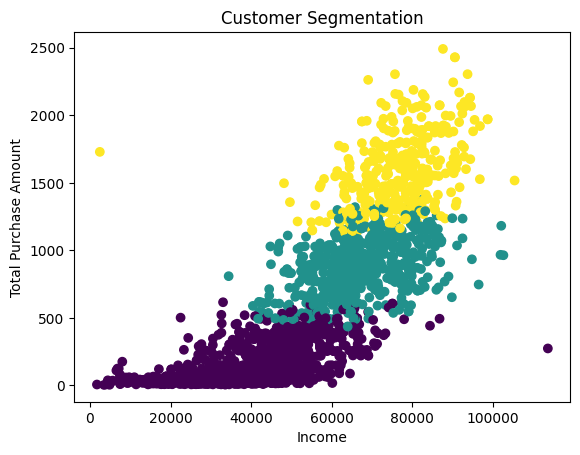

In [ ]:
plt.scatter(df['Income'], df['MntTotal'], c=df['Segment'])
plt.xlabel('Income')
plt.ylabel('Total Purchase Amount')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
segment_0 = df[df['Segment'] == 0]
segment_1 = df[df['Segment'] == 1]
segment_2 = df[df['Segment'] == 2]

avg_income_segment_0 = segment_0['Income'].mean()
avg_income_segment_1 = segment_1['Income'].mean()
avg_income_segment_2 = segment_2['Income'].mean()

print("Segment 0 Average Income: ", avg_income_segment_0)
print("Segment 1 Average Income: ", avg_income_segment_1)
print("Segment 2 Average Income: ", avg_income_segment_2)

Segment 0 Average Income:  37889.68053375196
Segment 1 Average Income:  66693.87096774194
Segment 2 Average Income:  76820.39766081871


In [ ]:
features = df[['Income', 'Index']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

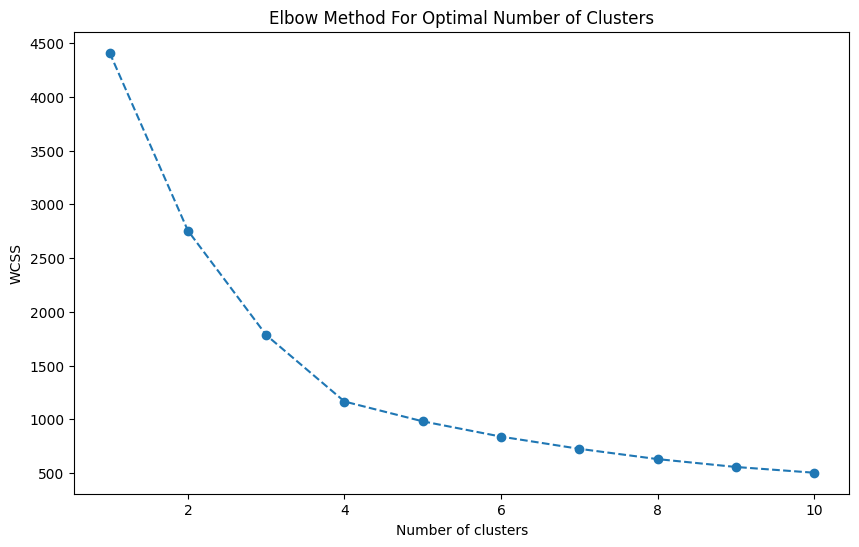

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()